# 用户指南，第25章：后调式工具（1）
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_25_postTonalTools1.html)

In [1]:
from music21 import *
aScore = corpus.parse('beethoven/opus59no2', 3)
[e.id for e in aScore.parts]

['Violin I.', 'Violin II.', 'Viola.', 'Violoncello.']

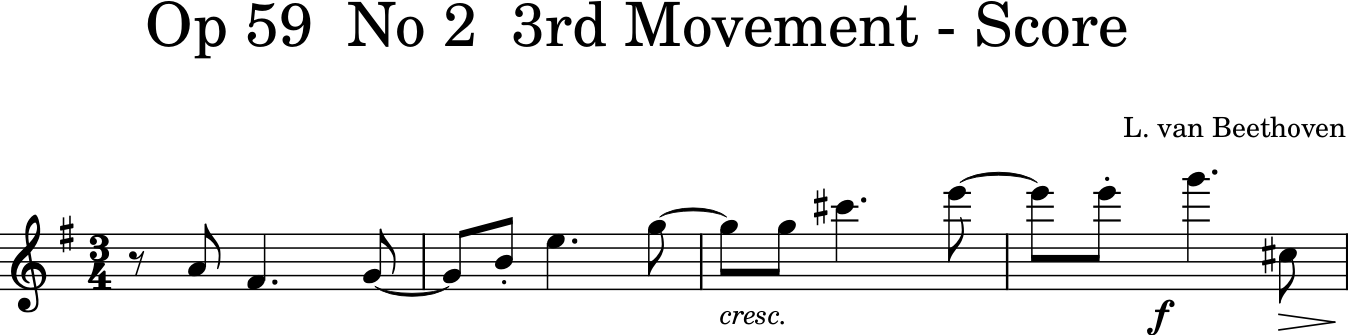

In [2]:
vlnPart = aScore.getElementById('Violin I.')
mRange = vlnPart.measures(4, 7)
mRange.show()

In [3]:
', '.join([str(p) for p in mRange.pitches])

'A4, F#4, G4, G4, B4, E5, G5, G5, G5, C#6, E6, E6, E6, G6, C#5'

In [4]:
[p.pitchClass for p in mRange.pitches]

[9, 6, 7, 7, 11, 4, 7, 7, 7, 1, 4, 4, 4, 7, 1]

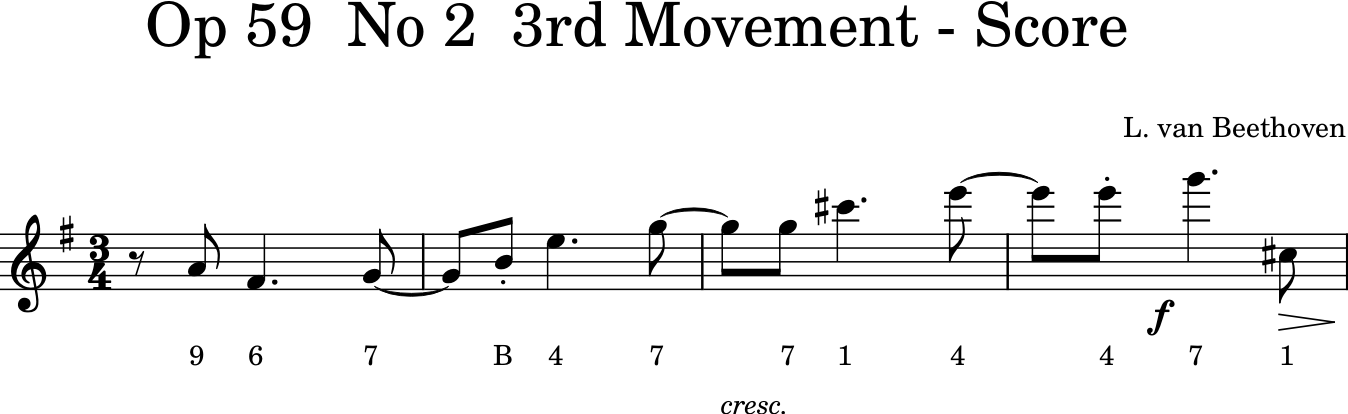

In [5]:
for n in mRange.recurse().notes:
    if n.tie is None or n.tie.type == 'start':
        n.lyric = n.pitch.pitchClassString
mRange.show()

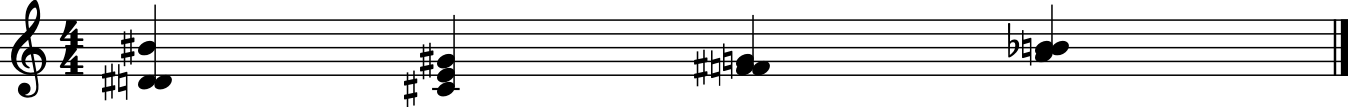

In [6]:
aStream = stream.Stream()
src = list(range(12)) # cheate a list of integers 0 through 11
src = src[2:4] + src[0:2] + src[8:9] + src[4:8] + src[9:12] # recombine
for i in range(0, 12, 3):
    aStream.append(chord.Chord(src[i:i + 3]))

aStream.show()

In [7]:
for c in aStream:
    print(c.orderedPitchClassesString)

<023>
<148>
<567>
<9AB>


In [8]:
for c in aStream:
    print(c.forteClass)

3-2B
3-11A
3-1
3-1


In [9]:
for c in aStream:
    print(c.forteClassTnI)

3-2
3-11
3-1
3-1


In [10]:
for c in aStream:
    print(c.normalOrder)

[0, 2, 3]
[1, 4, 8]
[5, 6, 7]
[9, 10, 11]


In [11]:
for c in aStream:
    print(c.primeFormString)

<013>
<037>
<012>
<012>


In [12]:
for c in aStream:
    print(c.intervalVector)

[1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 1, 0]
[2, 1, 0, 0, 0, 0]
[2, 1, 0, 0, 0, 0]


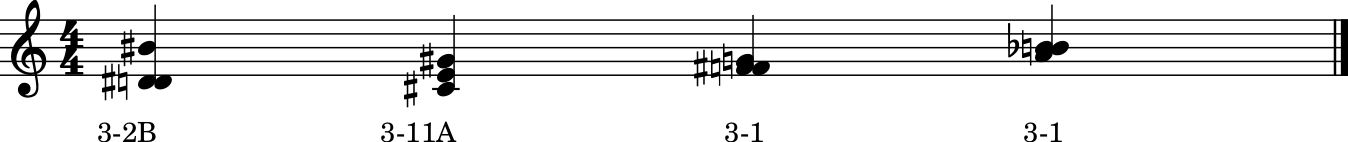

In [13]:
for c in aStream:
    c.lyric = c.forteClass
aStream.show()

In [14]:
import itertools
c = chord.Chord([0, 1, 2, 4, 7, 8])
c.commonName

'all tri-chord hexachord'

In [15]:
cc = set()
for i in itertools.combinations(c.pitches, 3):
    cc.add(chord.Chord(i).forteClassNumber)
cc

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [16]:
aRow = serial.getHistoricalRowByName('RowBergViolinConcerto')
aRow.show('text')

{0.0} <music21.note.Note G>
{1.0} <music21.note.Note B->
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note F#>
{4.0} <music21.note.Note A>
{5.0} <music21.note.Note C>
{6.0} <music21.note.Note E>
{7.0} <music21.note.Note G#>
{8.0} <music21.note.Note B>
{9.0} <music21.note.Note C#>
{10.0} <music21.note.Note E->
{11.0} <music21.note.Note F>


In [17]:
aMatrix = aRow.matrix()
print(aMatrix)

  0  3  7  B  2  5  9  1  4  6  8  A
  9  0  4  8  B  2  6  A  1  3  5  7
  5  8  0  4  7  A  2  6  9  B  1  3
  1  4  8  0  3  6  A  2  5  7  9  B
  A  1  5  9  0  3  7  B  2  4  6  8
  7  A  2  6  9  0  4  8  B  1  3  5
  3  6  A  2  5  8  0  4  7  9  B  1
  B  2  6  A  1  4  8  0  3  5  7  9
  8  B  3  7  A  1  5  9  0  2  4  6
  6  9  1  5  8  B  3  7  A  0  2  4
  4  7  B  3  6  9  1  5  8  A  0  2
  2  5  9  1  4  7  B  3  6  8  A  0


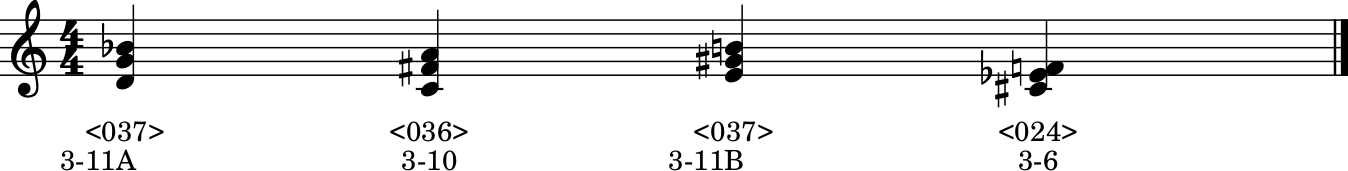

In [18]:
bStream = stream.Stream()
for i in range(0, 12, 3):
    c = chord.Chord(aRow[i:i + 3])
    c.addLyric(c.primeFormString)
    c.addLyric(c.forteClass)
    bStream.append(c)
bStream.show()